# COVID-19 Worldwide Data
**Joe Corliss**

[Download time_series_covid19_deaths_global.csv](https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

### Imports

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

### Load data

In [4]:
deaths = pd.read_csv('time_series_covid19_deaths_global.txt')

In [5]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  74 non-null     object 
 1   Country/Region  245 non-null    object 
 2   Lat             245 non-null    float64
 3   Long            245 non-null    float64
 4   1/22/20         245 non-null    int64  
 5   1/23/20         245 non-null    int64  
 6   1/24/20         245 non-null    int64  
 7   1/25/20         245 non-null    int64  
 8   1/26/20         245 non-null    int64  
 9   1/27/20         245 non-null    int64  
 10  1/28/20         245 non-null    int64  
 11  1/29/20         245 non-null    int64  
 12  1/30/20         245 non-null    int64  
 13  1/31/20         245 non-null    int64  
 14  2/1/20          245 non-null    int64  
 15  2/2/20          245 non-null    int64  
 16  2/3/20          245 non-null    int64  
 17  2/4/20          245 non-null    int

In [6]:
deaths.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
45,Saskatchewan,Canada,52.9399,-106.4509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106,NaN,Finland,64.0000,26.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3
70,Ningxia,China,37.2692,106.1655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22,22,27,29,29,29,33,35,41,42,43,45
219,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
deaths.drop(columns={'Lat', 'Long'}, inplace=True)

In [8]:
deaths.rename(columns={'Country/Region': 'country', 'Province/State': 'province'}, inplace=True)

In [9]:
deaths.sample(5)

,province,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
110,Mayotte,France,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177,NaN,Pakistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,5,6,7,8
108,French Polynesia,France,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
107,French Guiana,France,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145,NaN,Kyrgyzstan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Look for double-counting

In [10]:
deaths['country'].value_counts()

China                               33
Canada                              13
France                              10
Australia                            8
United Kingdom                       7
Netherlands                          4
Denmark                              3
Saint Vincent and the Grenadines     1
United Arab Emirates                 1
Thailand                             1
Finland                              1
Afghanistan                          1
Honduras                             1
Grenada                              1
Panama                               1
Luxembourg                           1
Mexico                               1
Equatorial Guinea                    1
Algeria                              1
Bolivia                              1
Gabon                                1
Lithuania                            1
Liechtenstein                        1
Bulgaria                             1
Suriname                             1
South Africa             

In [11]:
deaths.loc[deaths['country'].map(deaths['country'].value_counts() > 1)].iloc[:, [1, 0, -1]].sort_values(['country', 'province'])

,country,province,3/25/20
8,Australia,Australian Capital Territory,0
9,Australia,New South Wales,7
10,Australia,Northern Territory,0
11,Australia,Queensland,0
12,Australia,South Australia,0
13,Australia,Tasmania,0
14,Australia,Victoria,0
15,Australia,Western Australia,1
35,Canada,Alberta,2
36,Canada,British Columbia,13


### Processing

In [12]:
deaths = deaths.groupby('country').sum().reset_index()

In [13]:
deaths.sample(5)

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
73,Hungary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,3,4,6,7,9,10
121,Oman,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112,Namibia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51,Equatorial Guinea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102,Malta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
deaths = deaths.melt(id_vars={'country'}, var_name='date', value_name='deaths')

In [15]:
deaths['date'] = pd.to_datetime(deaths['date'])

In [16]:
deaths.sample(5)

,country,date,deaths
8407,Ethiopia,2020-03-10,0
1538,South Africa,2020-01-30,0
4052,El Salvador,2020-02-14,0
2453,Belize,2020-02-05,0
1280,Germany,2020-01-29,0


In [17]:
print(*deaths['country'].unique(), sep='\n')

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Madagascar
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexico
Moldova
Monaco
Mongolia
Montenegr

In [19]:
deaths.loc[deaths['country'] == 'US'].sort_values('date')

,country,date,deaths
162,US,2020-01-22,0
336,US,2020-01-23,0
510,US,2020-01-24,0
684,US,2020-01-25,0
858,US,2020-01-26,0
1032,US,2020-01-27,0
1206,US,2020-01-28,0
1380,US,2020-01-29,0
1554,US,2020-01-30,0
1728,US,2020-01-31,0


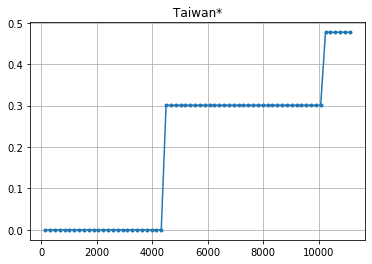

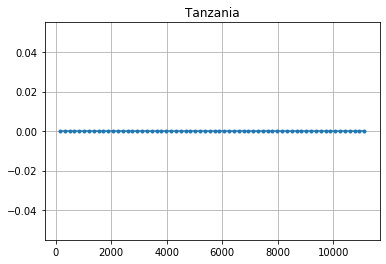

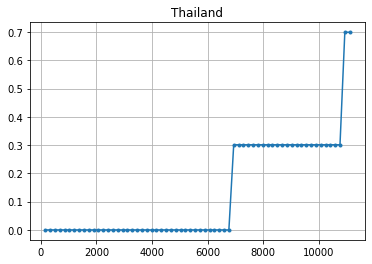

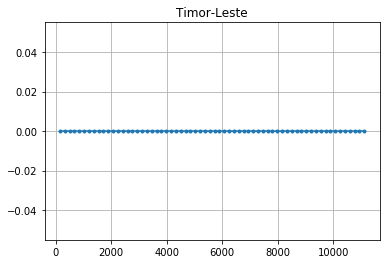

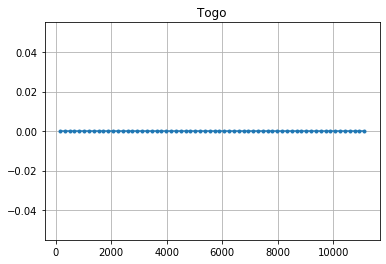

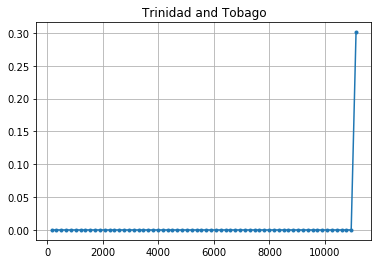

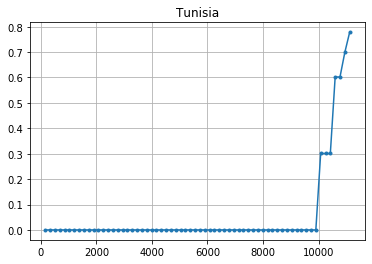

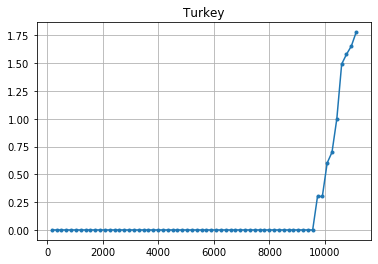

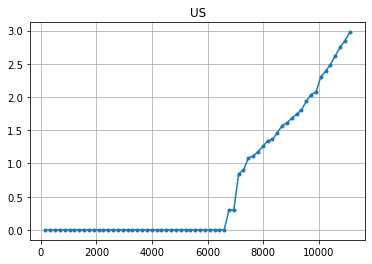

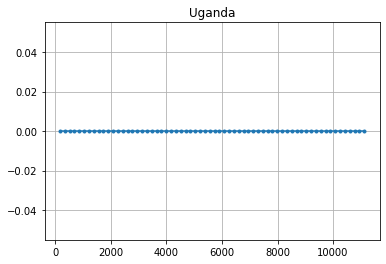

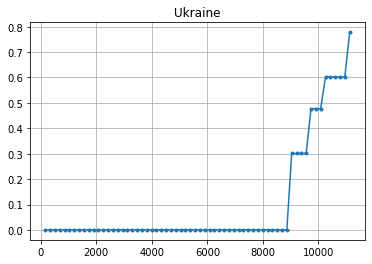

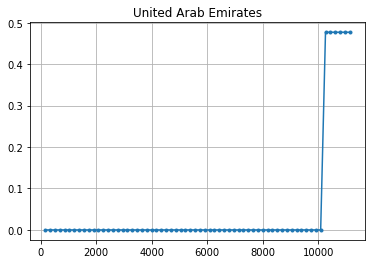

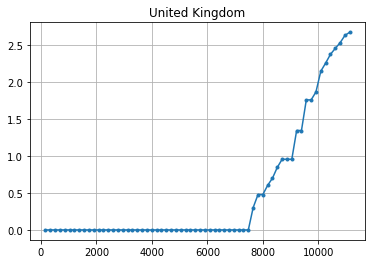

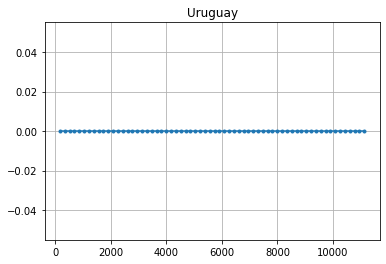

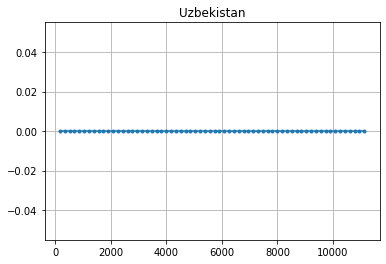

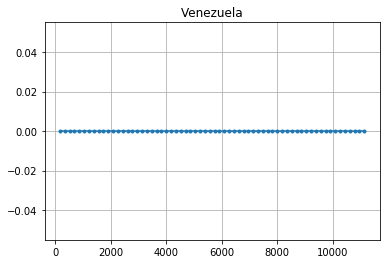

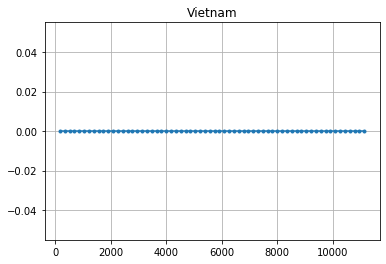

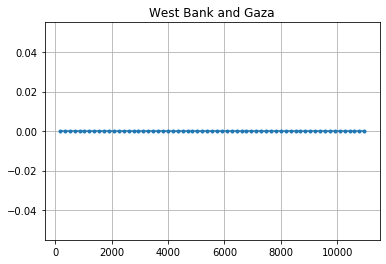

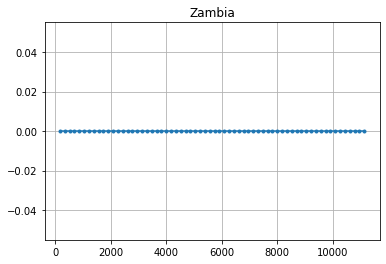

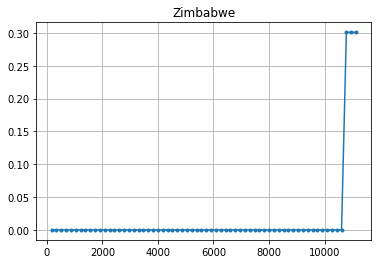

In [22]:
for country in deaths['country'].unique()[-20:]:
    plt.figure()
    deaths.loc[deaths['country'] == country].sort_values('date')['deaths'].apply(lambda x: np.log10(x + 1)).plot.line(marker='.')
    plt.grid(True)
    plt.title(country)

### Calculate finite differences